In [1]:
from acip.acip import ACIP
from utils.utils_experiment import read_config, load_data
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = 'spleen'

In [7]:
#plt.ioff()
X, Y = load_data(dataset)
w = ACIP(X, Y, config=dataset)


*********** Reducing dimensionality **************
Using pca.
Embedding created. Train MSE: 0.5090912

****************** Clustering ********************
Using kmedoids.
Trying n_clusters=16: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
Clustering complete.
Highest silhouette score is achieved for n_clusters = 6

***************** Visualizing ********************
Reducing dimensionality for visualization using umap.


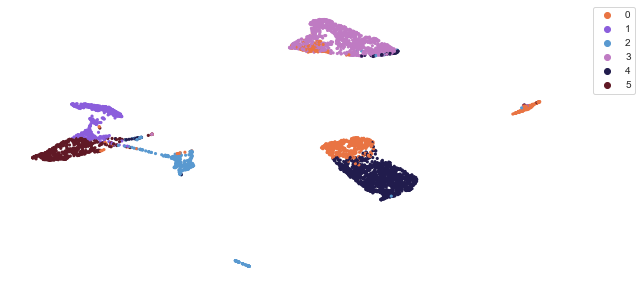

In [8]:
w.flow()